# less social factors for now
* Focus on NE region of US counties so that climate is about the same but difference is more social factors
* Merge data and explore to see patterns if any
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
avg_NE_aqi_2017_2019 = pd.read_csv('../../data/processed/clean_avg_NE_aqi_2017_2019')

NE_dem_ratio_2017_2019 = pd.read_csv('../../data/processed/clean_NE_dem_ratio_2017_2019.csv')

NE_unemploy_rate_2017_2019 = pd.read_csv('../../data/processed/clean_NE_unemploy_rate_2017_2019.csv')

NE_pov_ratio_2017_2019 = pd.read_csv('../../data/processed/clean_NE_pov_rate_2017_2019.csv')

NE_educ_vehicle_2017_2019 = pd.read_csv('../../data/processed/clean_NE_edu_vehicle_2017_2019.csv')

In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

* have all data for 2017 all compiled together merged columns
* then repeat for 2018 and 2019 data

In [48]:
display(avg_NE_aqi_2017_2019)
display(NE_unemploy_rate_2017_2019)
display(NE_pov_ratio_2017_2019)
display(NE_educ_vehicle_2017_2019)
display(NE_dem_ratio_2017_2019)

,GeoFIPS,State Name,county Name,AQI_2017,AQI_2018,AQI_2019
0,9001,Connecticut,Fairfield,46.315068,47.904110,46.495890
1,9003,Connecticut,Hartford,43.202740,40.594521,41.490411
2,9005,Connecticut,Litchfield,38.250689,38.449036,38.564384
3,9007,Connecticut,Middlesex,44.028986,43.875000,44.487805
4,9009,Connecticut,New Haven,44.789041,45.509589,46.090411
...,...,...,...,...,...,...
142,42133,Pennsylvania,York,44.241096,41.961644,41.761644
143,50003,Vermont,Bennington,36.271978,36.186301,35.994521
144,50007,Vermont,Chittenden,35.632877,38.520548,37.457534
145,50021,Vermont,Rutland,38.172603,38.780822,38.273973


,GeoFIPS,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
0,9001,CT,"Fairfield County, CT",4.6,4.0,3.6
1,9003,CT,"Hartford County, CT",4.9,4.3,3.9
2,9005,CT,"Litchfield County, CT",4.4,3.9,3.5
3,9007,CT,"Middlesex County, CT",4.1,3.5,3.2
4,9009,CT,"New Haven County, CT",5.1,4.4,3.9
...,...,...,...,...,...,...
234,50019,VT,"Orleans County, VT",5.0,4.3,4.2
235,50021,VT,"Rutland County, VT",3.4,3.0,2.8
236,50023,VT,"Washington County, VT",2.9,2.5,2.3
237,50025,VT,"Windham County, VT",3.0,2.7,2.6


,GeoFIPS,Postal Code,Name,"Poverty Percent, All Ages 2017","Poverty Percent, All Ages 2018","Poverty Percent, All Ages 2019"
0,9001,CT,Fairfield County,8.8,10.0,9.0
1,9003,CT,Hartford County,11.0,11.2,10.8
2,9005,CT,Litchfield County,6.9,6.9,7.1
3,9007,CT,Middlesex County,6.8,6.7,7.0
4,9009,CT,New Haven County,11.0,11.6,12.0
...,...,...,...,...,...,...
233,50019,VT,Orleans County,15.2,12.2,12.7
234,50021,VT,Rutland County,10.8,10.4,10.8
235,50023,VT,Washington County,9.4,10.8,8.4
236,50025,VT,Windham County,11.6,12.0,11.6


,GeoFIPS,NAME,state,county,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,...,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,66.185928,8.359560,23.588116,18.327358,7.552247,8.358647,...,7.361611,7.866947,35.461420,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,71.525086,4.635684,16.980541,19.820419,16.481561,13.606880,...,16.692083,13.376173,46.076042,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,69.072735,6.482821,20.662745,22.667695,11.062900,8.196574,...,11.787576,10.642420,38.725459,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,70.638028,6.761459,26.921199,21.483990,7.738806,7.732574,...,8.302017,9.023341,38.738569,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,69.456038,6.873693,18.559191,18.702062,13.936407,11.384685,...,13.946120,11.819717,41.403545,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,36079,"Putnam County, New York",36,79,71.933993,5.124694,20.737392,18.218338,15.030758,12.822810,...,16.365328,13.018242,40.700967,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
148,36081,"Queens County, New York",36,81,71.878018,12.930820,20.936054,15.809711,14.245424,7.956009,...,15.182197,8.990191,17.077931,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
149,36083,"Rensselaer County, New York",36,83,69.525175,5.694269,19.865767,21.884274,12.611287,9.469578,...,13.420554,8.401801,42.175211,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
150,36085,"Richmond County, New York",36,85,69.678470,8.140650,21.009139,17.452832,13.788069,9.287779,...,14.675154,9.263113,26.658042,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield County,943038,48.698144,51.301856,38.829612,40.207712,5.820020,6.748509,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,9003,Connecticut,Hartford County,893076,48.577389,51.422611,36.713113,38.908671,7.458828,8.052954,...,7.626834,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819
2,9005,Connecticut,Litchfield County,181667,49.403029,50.596971,46.221383,47.592023,1.153209,0.968806,...,3.141965,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736
3,9007,Connecticut,Middlesex County,162942,48.714266,51.285734,43.542488,45.679444,2.628543,2.723055,...,2.782019,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013
4,9009,Connecticut,New Haven County,857748,48.214627,51.785373,37.804577,40.195955,6.927792,7.800659,...,8.058080,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,50019,Vermont,Orleans County,26811,50.199545,49.800455,48.375667,48.054903,0.477416,0.309574,...,0.828494,0.702741,0.073973,0.070274,0.059178,0.051781,0.022192,0.018493,0.011096,0.007397
235,50021,Vermont,Rutland County,59006,49.347524,50.652476,47.701929,48.906891,0.415212,0.250822,...,0.740664,0.704576,0.089361,0.044680,0.054991,0.049836,0.024059,0.015466,0.006874,0.005155
236,50023,Vermont,Washington County,58253,49.453247,50.546753,47.386401,48.524540,0.573361,0.374230,...,0.919379,0.910819,0.089027,0.051362,0.068483,0.053074,0.018833,0.020545,0.006848,0.000000
237,50025,Vermont,Windham County,42851,49.002357,50.997643,46.542671,48.425941,0.828452,0.576416,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737


## Try make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [43]:
avg_NE_aqi_2017 = avg_NE_aqi_2017_2019.iloc[:,:4]
NE_unemploy_rate_2017 = NE_unemploy_rate_2017_2019.iloc[:, [0, 3]]
NE_pov_ratio_2017 = NE_pov_ratio_2017_2019.iloc[:, [0, 3]]

educ_vehicle_2017_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[4:11])
NE_educ_vehicle_2017 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[3:76])
NE_dem_ratio_2017 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [50]:
NE_avg_aqi_unemploy_2017 = pd.merge(avg_NE_aqi_2017, NE_unemploy_rate_2017, how='inner')
NE_avg_aqi_unemploy_pov_2017 = pd.merge(NE_avg_aqi_unemploy_2017, NE_pov_ratio_2017, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2017 = pd.merge(NE_avg_aqi_unemploy_pov_2017, NE_educ_vehicle_2017, how='inner')
df_2017 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2017, NE_dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,county Name,AQI_2017,Unemployment_rate_2017,"Poverty Percent, All Ages 2017",EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,9001,Connecticut,Fairfield,46.315068,4.6,8.8,68.187249,7.514730,14.575317,13.950844,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
1,9003,Connecticut,Hartford,43.202740,4.9,11.0,69.832855,7.451853,18.925873,17.087453,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
2,9005,Connecticut,Litchfield,38.250689,4.4,6.9,74.879924,5.500145,21.216180,20.819313,...,2.739078,2.630637,0.390825,0.361100,0.142569,0.131559,0.040183,0.039633,0.030826,0.019816
3,9007,Connecticut,Middlesex,44.028986,4.1,6.8,73.032250,3.989352,20.758827,19.276054,...,2.658001,2.714463,0.386641,0.427146,0.088375,0.102490,0.055848,0.054007,0.025162,0.025162
4,9009,Connecticut,New Haven,44.789041,5.1,11.0,69.599679,6.457780,21.765386,17.591218,...,7.649333,7.797512,1.208747,1.338155,0.262198,0.275372,0.093034,0.090236,0.044419,0.045701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,42111,Pennsylvania,Somerset,37.041322,6.0,12.6,74.123837,8.352908,38.902834,16.183675,...,0.879556,0.447186,0.136042,0.017510,0.051184,0.024245,0.048490,0.005388,0.002694,0.002694
119,42125,Pennsylvania,Washington,49.115068,5.2,9.4,71.815936,4.663335,26.510145,18.154541,...,0.809852,0.687191,0.104793,0.090305,0.054087,0.034770,0.021248,0.021731,0.005312,0.004346
120,42129,Pennsylvania,Westmoreland,46.994475,5.1,9.9,74.017872,4.170980,26.588718,20.676522,...,0.542320,0.494310,0.085226,0.079544,0.031534,0.027556,0.008807,0.010227,0.004829,0.003693
121,42133,Pennsylvania,York,44.241096,4.3,9.4,69.669654,7.209501,26.845081,18.014114,...,3.045227,2.871708,0.733809,0.703953,0.159153,0.140521,0.052303,0.054098,0.024692,0.024243


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

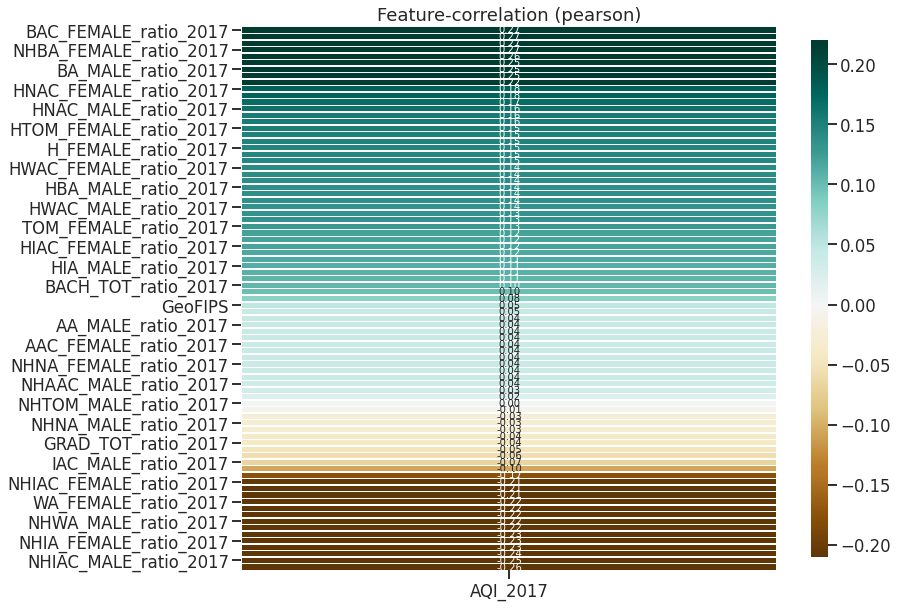

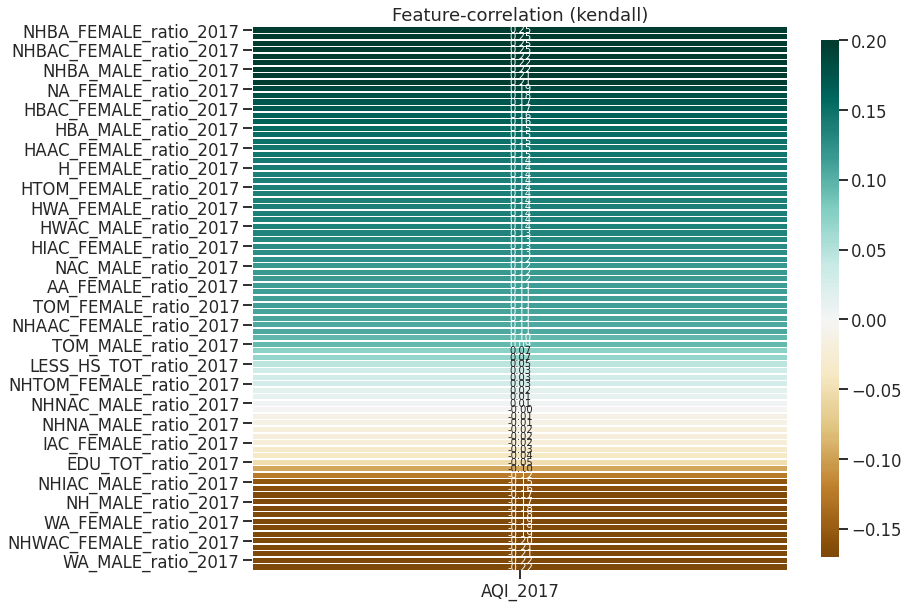

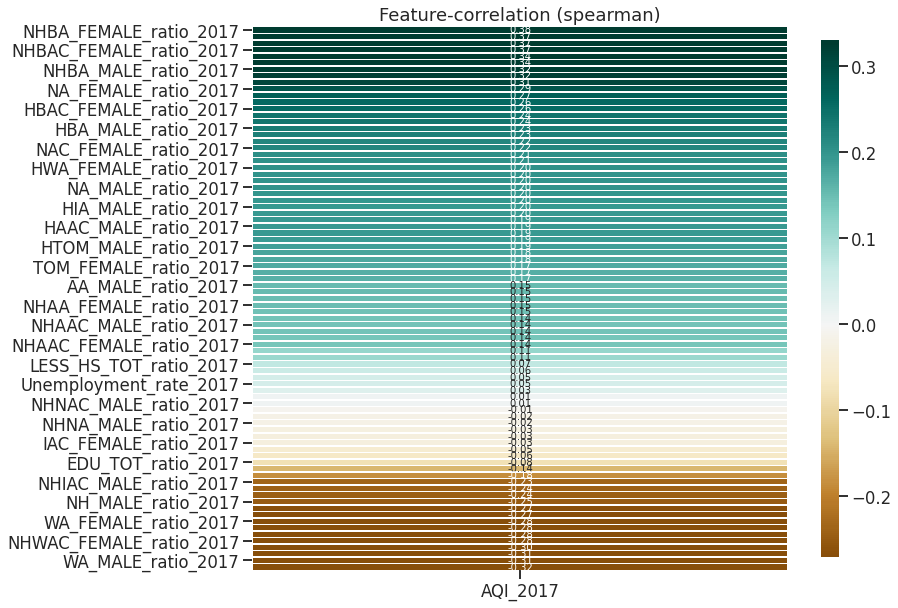

In [51]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')